In [43]:
%load_ext autoreload
%autoreload 2

from __future__ import absolute_import
import tools._init_paths
from tools.wrapped_model import WrappedDetectron, union_masks, apply_binary_mask, grayscale
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
model = WrappedDetectron()

Loaded with parameters:
Namespace(cfg_file='configs/baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml', cuda=True, dataset='coco', image_dir='test_imgs/', load_detectron='data/model_final.101.pkl')
load cfg from file: configs/baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml
loading detectron weights data/model_final.101.pkl
loaded models


/home/marc/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/marc/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


/home/marc/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/marc/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


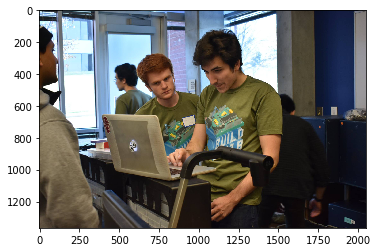

0.99870944


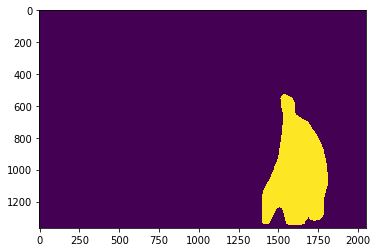

0.9963413


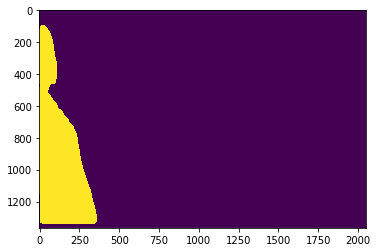

0.9972978


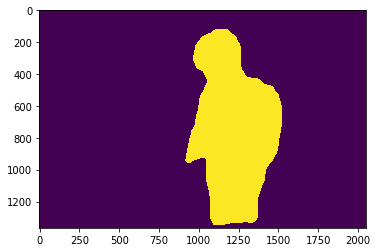

0.992222


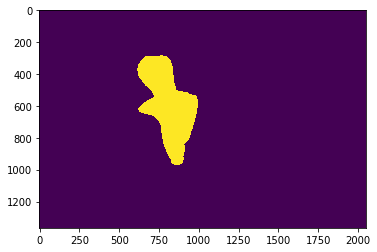

0.9839373


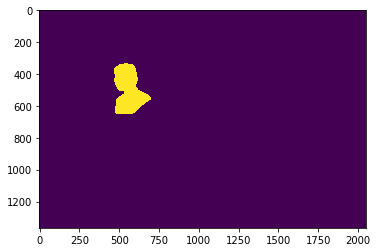

In [138]:
filename = 'test_imgs/02.jpg'
scored_masks = model.segment_people(filename)
im = cv2.imread(filename)
plt.imshow(im[:, :, ::-1])
plt.show()
for mask, score in scored_masks:
    print(score)
    plt.imshow(mask)
    plt.show()

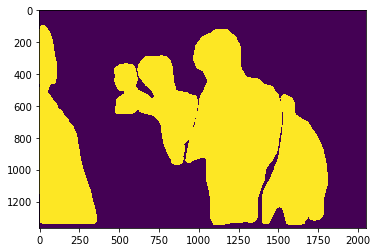

In [139]:
masks = [m for m, s in scored_masks]
union = union_masks(masks)
plt.imshow(union);

(1365, 2048, 3) (1365, 2048, 3)


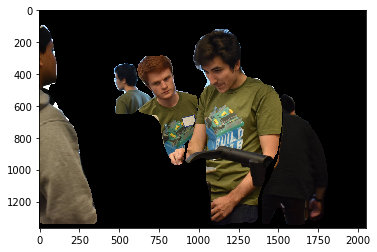

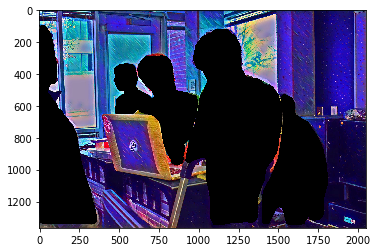

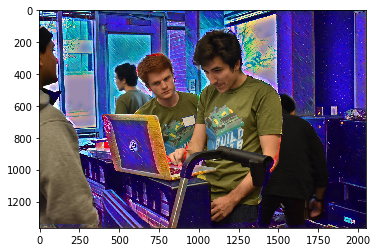

True

In [152]:
im = cv2.imread(filename)
styled = cv2.imread('02_styled_eagle.jpg')
styled = cv2.resize(styled, (im.shape[1], im.shape[0]))

# styled = cv2.imread('test_imgs/02.jpg')
# styled[:, :, 1] = 0

# styled = grayscale(im)

print(im.shape, styled.shape)
out, s, c = apply_binary_mask(im, styled, ~union)
plt.imshow(s[:, :, ::-1])
plt.show()
plt.imshow(c[:, :, ::-1])
plt.show()
plt.imshow(out[:, :, ::-1])
plt.show()
cv2.imwrite('out.png', out)

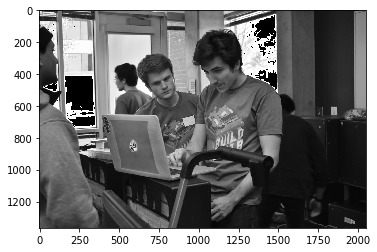

In [69]:
plt.imshow(styled)

In [ ]:
im = cv2.imread('test_imgs/02.jpg')
m = im.copy()

In [ ]:
im = cv2.imread('test_imgs/02.jpg')
m = im.copy()

i = 2

#original
plt.imshow(m[:, :, ::-1])
plt.show()

#mask
plt.imshow(global_stuff[4])
plt.show()

#styled
styled = cv2.imread('02_styled.jpg')
styled = cv2.resize(styled, (2048, 1365)) 
plt.imshow(styled[:, :, ::-1])
plt.show()

#merged
m[(global_stuff[i] == 1) | (global_stuff[4] == 1)] = 0
styled[(global_stuff[i] == 0) & (global_stuff[4] == 0)] = 0
final = (m+styled)
plt.imshow(final[:, :, ::-1])
plt.show()

In [ ]:
cv2.imwrite('out.png', final)

In [ ]:
(global_stuff[i] == 1)| (global_stuff[3] == 1)